# Quantrack Python crash course 8.

In this notebook we discuss a lot of the essential functionality common to the pandas data structures. We will import our first data-set, and plot our first figures.

### 1. Basic commands - Boolean Indexing and missing data
### 2. Load Data - os package - a few pre-processing commands
### 3. Operations - Basic statistics

*Pandas* is basically your data's home. With *Panda* , you can perform almost every data-analysis steps. In the previous notebooks we :

1. Manipulated pandas Series and created a toy dataset using np.random() function

2. Calculated statistics and answered questions about the data, like:

    * What's the average, median, max, or min of each column?
    * Does column A correlate with column B?
    * What does the distribution of data in column C look like?
    
Today we will load our first *real* data-set and try to deal with categorical data for the first time.

In [113]:
import pandas as pd
import numpy as np

##### Create a toy dataset using np.random() with date index

In [12]:
dates = dates = pd.date_range('20200101', periods=10)

array = np.random.randn(10,4)
columns = ['A','B','C','D']

df = pd.DataFrame(array,index=dates,columns=columns)

In [20]:
#Here is our toy dataframe we will use
df

,A,B,C,D
2020-01-01,-0.070925,0.138237,0.506134,-0.941016
2020-01-02,0.418575,-0.496418,0.312773,-0.943710
2020-01-03,1.637446,-2.125635,-0.485950,-1.244256
2020-01-04,0.588569,0.377503,-0.187324,0.224445
2020-01-05,-1.746431,1.554862,0.321963,-1.367792
2020-01-06,2.549650,0.444389,0.517645,0.653294
2020-01-07,0.739476,0.239117,0.044944,-0.469409
2020-01-08,0.185800,0.713789,0.490189,0.574315
2020-01-09,-0.016894,-1.774656,-0.791557,-1.160052
2020-01-10,3.000655,-1.953095,-0.234889,-0.139699


## 1. Basic commands - Boolean indexing


Boolean indexing means : Selecting lines or columns of your data-frame based on some conditions

In [22]:
#Only lines where A > 0
df[df['A'] > 0]

,A,B,C,D
2020-01-02,0.418575,-0.496418,0.312773,-0.943710
2020-01-03,1.637446,-2.125635,-0.485950,-1.244256
2020-01-04,0.588569,0.377503,-0.187324,0.224445
2020-01-06,2.549650,0.444389,0.517645,0.653294
2020-01-07,0.739476,0.239117,0.044944,-0.469409
2020-01-08,0.185800,0.713789,0.490189,0.574315
2020-01-10,3.000655,-1.953095,-0.234889,-0.139699


In [24]:
#Selecting only values >0 , other values will be replaces by NaN
df[df > 0]

,A,B,C,D
2020-01-01,NaN,0.138237,0.506134,NaN
2020-01-02,0.418575,NaN,0.312773,NaN
2020-01-03,1.637446,NaN,NaN,NaN
2020-01-04,0.588569,0.377503,NaN,0.224445
2020-01-05,NaN,1.554862,0.321963,NaN
2020-01-06,2.549650,0.444389,0.517645,0.653294
2020-01-07,0.739476,0.239117,0.044944,NaN
2020-01-08,0.185800,0.713789,0.490189,0.574315
2020-01-09,NaN,NaN,NaN,NaN
2020-01-10,3.000655,NaN,NaN,NaN


In *real-life data-analysis* , we use *NaN* to represent missing values. Missing values are frequent in any data-science projects, and they can be due to various causes. Let's see how to deal with them

We can drop any rows that have missing data 

In [34]:
df_with_NaN = df[df > 0]

df_without_NaN = df_with_NaN.dropna(how='any')

print('We have two rows left')
df_without_NaN

We have two rows left


,A,B,C,D
2020-01-06,2.54965,0.444389,0.517645,0.653294
2020-01-08,0.18580,0.713789,0.490189,0.574315


We can also fill missing data using range of available methods in *Pandas* package

In [112]:
#Fill it using fixed value
df_with_NaN.fillna(value='Gracias Parce')

,A,B,C,D
2020-01-01,Gracias Parce,0.138237,0.506134,Gracias Parce
2020-01-02,0.418575,Gracias Parce,0.312773,Gracias Parce
2020-01-03,1.63745,Gracias Parce,Gracias Parce,Gracias Parce
2020-01-04,0.588569,0.377503,Gracias Parce,0.224445
2020-01-05,Gracias Parce,1.55486,0.321963,Gracias Parce
2020-01-06,2.54965,0.444389,0.517645,0.653294
2020-01-07,0.739476,0.239117,0.0449436,Gracias Parce
2020-01-08,0.1858,0.713789,0.490189,0.574315
2020-01-09,Gracias Parce,Gracias Parce,Gracias Parce,Gracias Parce
2020-01-10,3.00066,Gracias Parce,Gracias Parce,Gracias Parce


We can calculate average of each columns using pd.DataFrame.mean() , let's use it to fill our missing values

In [44]:
#Calculate average
m = df_with_NaN.mean()

print(m)
print()
print('This print average value of each column')

A    1.302882
B    0.577983
C    0.365608
D    0.484018
dtype: float64

This print average value of each column


In [68]:
m = df_with_NaN.mean()

In [72]:
df_filled = df_with_NaN.fillna(m)
df_filled

,A,B,C,D
2020-01-01,1.302882,0.138237,0.506134,0.484018
2020-01-02,0.418575,0.577983,0.312773,0.484018
2020-01-03,1.637446,0.577983,0.365608,0.484018
2020-01-04,0.588569,0.377503,0.365608,0.224445
2020-01-05,1.302882,1.554862,0.321963,0.484018
2020-01-06,2.549650,0.444389,0.517645,0.653294
2020-01-07,0.739476,0.239117,0.044944,0.484018
2020-01-08,0.185800,0.713789,0.490189,0.574315
2020-01-09,1.302882,0.577983,0.365608,0.484018
2020-01-10,3.000655,0.577983,0.365608,0.484018


Cells that were equal to NaN are now filled with the average value of their corresponding column

## 2. Load data - os package - a few pre-processing commands

What is OS package ?

The OS module in Python provides a way of using operating system dependent functionality. The functions that the OS module provides allows you to interface with the underlying operating system that Python is running on – be that Windows, Mac or Linux. It's particularly useful to gather information about your working directory.

In [100]:
import os

print(os.getcwd())
print()

print('This is our current working directory')

/Users/Cesar/Desktop/quantrack/qt_internal_training/python_course_beginners/data-sets

This is our current working directory


Let's change our working directory to load the data-set

In [101]:
#command to change the directory
os.chdir('/Users/Cesar/Desktop/quantrack/qt_internal_training/python_course_beginners/data-sets')
print(os.getcwd())

/Users/Cesar/Desktop/quantrack/qt_internal_training/python_course_beginners/data-sets


This data set has 414 rows and 7 columns.   
It provides the market historical data set of real estate valuations which are collected from Sindian Dist., New Taipei City, Taiwan.  
It is a *.xlsx* data-set , pandas has built-in commands to deal with it

In [95]:
df_price = pd.read_excel('house_price.xlsx')
df_price

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


Let's print the columns :

In [98]:
df_price.columns

#let's create a new list to change the name of the columns, and make it a bit more user-friendly
new_columns = [
            'transaction_date',
            'house_age',
            'distance_metro',
            'number_stores',
            'lat',
            'long',
            'area_price_unit']

#let's change the columns :
df_price.columns = new_columns

In [99]:
df_price.head(5)

,transaction_date,house_age,distance_metro,number_stores,lat,long,area_price_unit
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


Let's check if our dataframe contains NaN values.

* We use dropna methods
* We verify if the two data-frame (the one after dropna, and the original one) have the same dimension. If it is the case there are no NaN values in our DataFrame.

In [106]:
df_remove_nan = df_price.dropna(how='any')
df_remove_nan

,transaction_date,house_age,distance_metro,number_stores,lat,long,area_price_unit
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


Dimensions (columns x rows) are the same, there are no NaN values

## 3. Basic statistics

Let's use our house pricing data-set and go through basic statistical operations

In [115]:
#calculate mean
df_price.mean()

transaction_date    2013.148953
house_age             17.712560
distance_metro      1083.885689
number_stores          4.094203
lat                   24.969030
long                 121.533361
area_price_unit       37.980193
dtype: float64

In [116]:
#get all basics statistics
df_price.describe()

,transaction_date,house_age,distance_metro,number_stores,lat,long,area_price_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


How to read these results ? 

* count:   	Number of non-null observations
* sum: 	    Sum of values
* mean: 	Mean of Values
* median: 	Median of Values
* mode: 	Mode of values
* std: 	    Standard Deviation of the Values
* min: 	    Minimum Value
* max: 	    Maximum Value
* abs: 	    Absolute Value
* prod: 	Product of Values
* cumsum: 	Cumulative Sum
* cumprod: 	Cumulative Product

#### Your first plot using seaborn

Seaborn is a Python data visualization library based on matplotlib.  
It provides a high-level interface for drawing attractive and informative statistical graphics.

In [117]:
import seaborn as sns

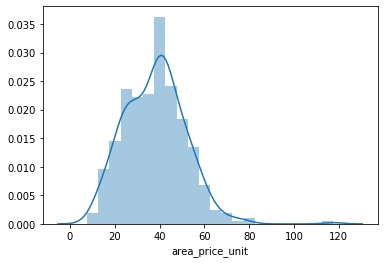

In [120]:
#we select one column using [] and column name
sns.distplot(df_price['area_price_unit'])